In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
dataset = pd.read_csv('admitance.csv')
dataset

,SAT,Admitted
0,1363,No
1,1792,Yes
2,1954,Yes
3,1653,No
4,1593,No
...,...,...
163,1722,Yes
164,1750,Yes
165,1555,No
166,1524,No


In [2]:
dataset['Admitted'] = dataset['Admitted'].map({'Yes':1,'No':0})
dataset

,SAT,Admitted
0,1363,0
1,1792,1
2,1954,1
3,1653,0
4,1593,0
...,...,...
163,1722,1
164,1750,1
165,1555,0
166,1524,0


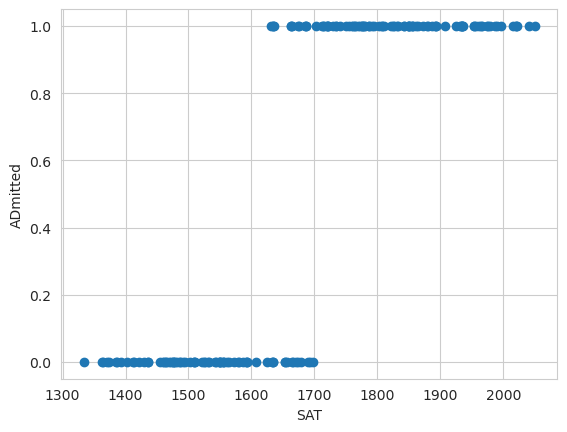

In [3]:
plt.scatter(dataset['SAT'],dataset['Admitted'])
plt.xlabel('SAT')
plt.ylabel('ADmitted')
plt.show()

In [4]:
#Linear Reggression
x = dataset['SAT']
y = dataset['Admitted']
import statsmodels.api as sm
x1 = sm.add_constant(x)
model_lin = sm.OLS(y,x1).fit()
model_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Admitted   R-squared:                       0.683
Model:                            OLS   Adj. R-squared:                  0.681
Method:                 Least Squares   F-statistic:                     357.5
Date:                Sat, 14 Jan 2023   Prob (F-statistic):           2.98e-43
Time:                        12:21:02   Log-Likelihood:                -24.262
No. Observations:                 168   AIC:                             52.52
Df Residuals:                     166   BIC:                             58.77
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -3.2519      0.203    -16.038      0.000      -3.652      -2.852
SAT            0.0022      0.000     18.907      0.000       0.002       0.002
==============================================================================
Omnibus:                        7.929   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                3.844
Skew:                           0.090   Prob(JB):                        0.146
Kurtosis:                       2.281   Cond. No.                     1.59e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#Logistic Regression
model_log = sm.Logit(y,x1).fit()
model_log.summary()

Optimization terminated successfully.
         Current function value: 0.137766
         Iterations 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:               Admitted   No. Observations:                  168
Model:                          Logit   Df Residuals:                      166
Method:                           MLE   Df Model:                            1
Date:                Sat, 14 Jan 2023   Pseudo R-squ.:                  0.7992
Time:                        12:21:38   Log-Likelihood:                -23.145
converged:                       True   LL-Null:                       -115.26
Covariance Type:            nonrobust   LLR p-value:                 5.805e-42
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -69.9128     15.737     -4.443      0.000    -100.756     -39.070
SAT            0.0420      0.009      4.454      0.000       0.024       0.060
==============================================================================

Possibly complete quasi-separation: A fraction 0.27 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [6]:
def f(x,b0,b1):
    return np.array(np.exp(b0+b1*x)/(1+np.exp(b0+b1*x)))

f(x1,-69.9128,0.0420).round(2)

array([[0.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.38],
       [0.  , 0.05],
       [0.  , 0.98],
       [0.  , 0.99],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.03],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.49],
       [0.  , 0.  ],
       [0.  , 0.77],
       [0.  , 1.  ],
       [0.  , 0.21],
       [0.  , 0.22],
       [0.  , 0.23],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.  ],
       [0.  , 0.  ],
       [0.  , 0.91],
       [0.  , 1.  ],
       [0.  , 0.22],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.98],
       [0.  , 0.  ],
       [0.  , 0.61],
       [0.  , 0.41],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 0.49],
       [0.  , 1.  ],
       [0.  , 0.39],
       [0.  , 0.  ],
       [0.  , 0.04],
       [0.  , 0.2 ],
       [0.  , 1.  ],
       [0.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 0.  ],
       [0.  , 0.98],
       [0.  ,

In [8]:
f_sorted = np.sort(f(x,-69.9128,0.0420))
f_sorted.round(2)

array([0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ,
       0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.01, 0.01, 0.01,
       0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04,
       0.04, 0.05, 0.05, 0.08, 0.16, 0.2 , 0.21, 0.22, 0.22, 0.22, 0.22,
       0.23, 0.38, 0.39, 0.41, 0.47, 0.48, 0.49, 0.49, 0.51, 0.56, 0.6 ,
       0.6 , 0.61, 0.65, 0.7 , 0.72, 0.72, 0.74, 0.77, 0.8 , 0.83, 0.88,
       0.89, 0.89, 0.91, 0.91, 0.91, 0.92, 0.94, 0.95, 0.95, 0.96, 0.97,
       0.98, 0.98, 0.98, 0.98, 0.98, 0.99, 0.99, 0.99, 0.99, 0.99, 0.99,
       0.99, 0.99, 0.99, 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  ,
       1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.  , 1.

In [9]:
x_sorted = np.sort(x)
x_sorted

array([1334, 1363, 1364, 1370, 1374, 1385, 1387, 1393, 1402, 1412, 1414,
       1422, 1430, 1435, 1435, 1455, 1460, 1461, 1464, 1464, 1469, 1473,
       1475, 1475, 1477, 1478, 1481, 1486, 1487, 1492, 1494, 1502, 1508,
       1508, 1510, 1521, 1524, 1526, 1531, 1532, 1542, 1543, 1549, 1550,
       1550, 1550, 1555, 1555, 1557, 1561, 1565, 1572, 1579, 1580, 1587,
       1591, 1593, 1593, 1607, 1625, 1631, 1633, 1634, 1634, 1634, 1634,
       1636, 1653, 1654, 1656, 1662, 1663, 1664, 1664, 1666, 1670, 1674,
       1674, 1675, 1679, 1685, 1687, 1687, 1690, 1693, 1697, 1702, 1712,
       1714, 1715, 1720, 1720, 1721, 1722, 1730, 1735, 1735, 1741, 1750,
       1755, 1760, 1761, 1764, 1764, 1769, 1773, 1775, 1775, 1777, 1778,
       1781, 1786, 1787, 1792, 1794, 1802, 1808, 1808, 1810, 1821, 1824,
       1826, 1831, 1832, 1842, 1843, 1849, 1850, 1850, 1850, 1855, 1855,
       1857, 1861, 1865, 1872, 1879, 1880, 1887, 1891, 1893, 1893, 1907,
       1925, 1931, 1933, 1934, 1934, 1934, 1936, 19

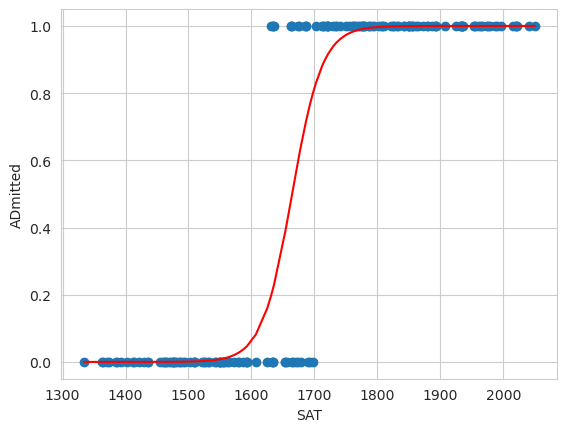

In [10]:
plt.scatter(x,y)
plt.plot(x_sorted,f_sorted,color='red')
plt.xlabel('SAT')
plt.ylabel('ADmitted')
plt.show()